In [1]:
from simulator.utils import *
from detector.utils import *
from detector.detector import *
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# img_size = 2236
img_size = 100
N = 2000 # number of training data


Distribution of Intensity in a Subplot
--------------------------------
1. generate a number of signals with and without atom
2. choose a box around the center
3. plot histogram for intensity
4. create plot for each SNR
5. find threshold line as a function of SNR
6. plot fidelity by applying the model to a set of testing data

In [9]:
# 1

prev_time = time.time()

x0 = img_size // 2 
y0 = img_size // 2 
sim = simulator(img_size, 1)

data_tr_for_different_snr = []
labels_tr_for_different_snr = []
SNR = np.linspace(1, 200, 20)
for snr in SNR:
    data_tr = []
    labels_tr = []
    for i in range(N):
        r = np.random.rand()
        if r > 0.5: 
            labels_tr.append(1)
            data = sim.create_simulation_from_SNR(x0, y0, snr)
            data_tr.append(data)
        else:
            labels_tr.append(0)
            data = sim.create_simulation_from_SNR(x0, y0, snr, no_atom=True)
            data_tr.append(data)
    data_tr_for_different_snr.append(np.array(data_tr))
    labels_tr_for_different_snr.append(np.array(labels_tr))

print(f"time used: {time.time() - prev_time}")


time used: 44.61969184875488


In [10]:
data_tr_for_different_snr = np.array(data_tr_for_different_snr)
labels_tr_for_different_snr = np.array(labels_tr_for_different_snr)

print(data_tr_for_different_snr.shape)
print(labels_tr_for_different_snr.shape)

(20, 2000, 100, 100)
(20, 2000)


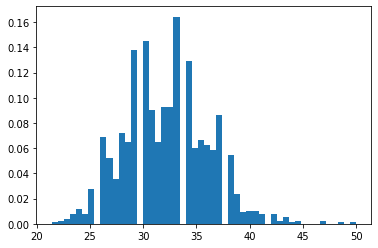

Training accuracy: 0.5529850746268656
Validation accuracy: 0.5409090909090909
Threshold: 30.18995106435024
SNR: 1.0


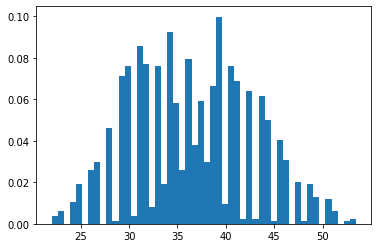

Training accuracy: 0.858955223880597
Validation accuracy: 0.8348484848484848
Threshold: 36.664034781512676
SNR: 11.473684210526315


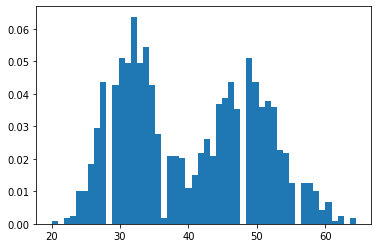

Training accuracy: 0.9753731343283583
Validation accuracy: 0.9621212121212122
Threshold: 41.17160879933902
SNR: 21.94736842105263


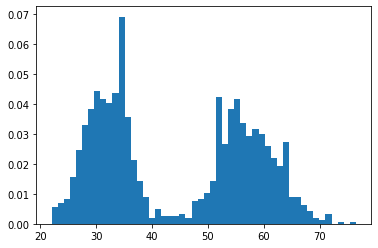

Training accuracy: 0.996268656716418
Validation accuracy: 0.9984848484848485
Threshold: 45.05677223492663
SNR: 32.421052631578945


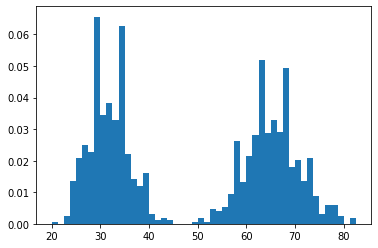

Training accuracy: 1.0
Validation accuracy: 1.0
Threshold: 49.18312697369803
SNR: 42.89473684210526


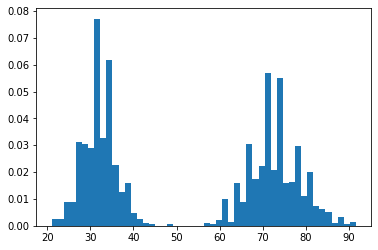

Training accuracy: 0.9992537313432835
Validation accuracy: 1.0
Threshold: 45.90801843191918
SNR: 53.368421052631575


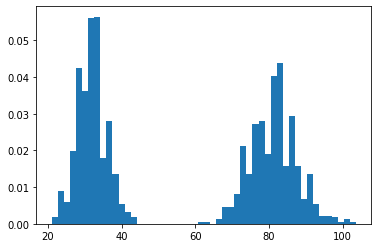

Training accuracy: 1.0
Validation accuracy: 1.0
Threshold: 45.78304970831388
SNR: 63.84210526315789


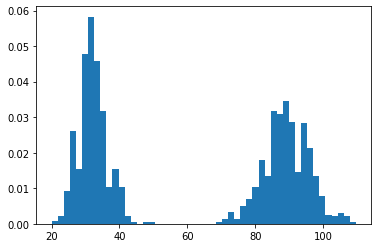

Training accuracy: 0.9955223880597015
Validation accuracy: 1.0
Threshold: 42.41190312458038
SNR: 74.3157894736842


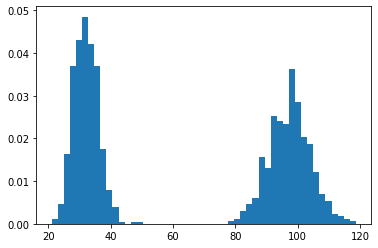

Training accuracy: 0.9985074626865672
Validation accuracy: 1.0
Threshold: 47.45637022769635
SNR: 84.78947368421052


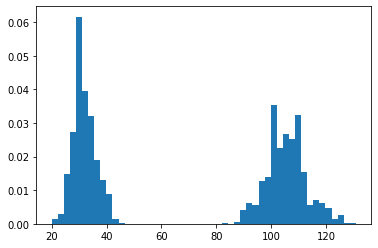

Training accuracy: 1.0
Validation accuracy: 1.0
Threshold: 46.65541813667906
SNR: 95.26315789473684


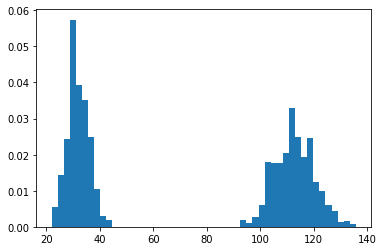

Training accuracy: 1.0
Validation accuracy: 1.0
Threshold: 44.34570503592178
SNR: 105.73684210526315


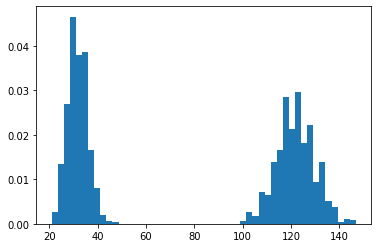

Training accuracy: 0.9977611940298508
Validation accuracy: 1.0
Threshold: 43.31889349766098
SNR: 116.21052631578947


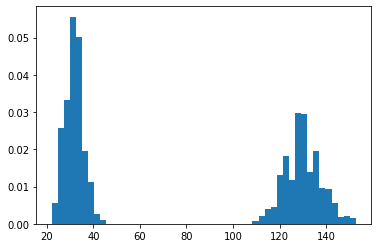

Training accuracy: 1.0
Validation accuracy: 1.0
Threshold: 44.48723924528659
SNR: 126.68421052631578


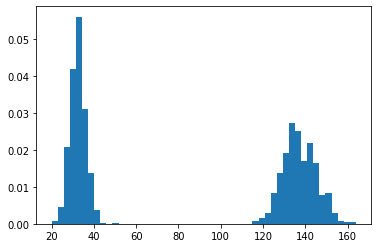

Training accuracy: 0.9992537313432835
Validation accuracy: 1.0
Threshold: 44.31644394174191
SNR: 137.15789473684208


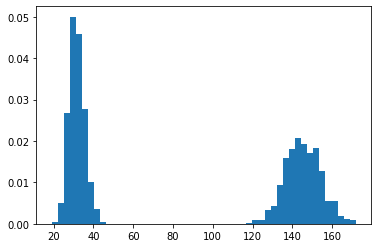

Training accuracy: 1.0
Validation accuracy: 1.0
Threshold: 47.54315149017078
SNR: 147.6315789473684


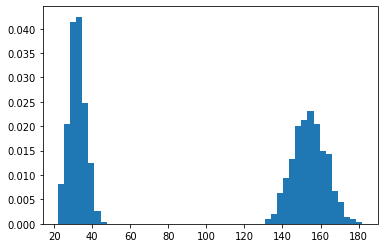

Training accuracy: 0.9985074626865672
Validation accuracy: 1.0
Threshold: 44.27112729403069
SNR: 158.10526315789474


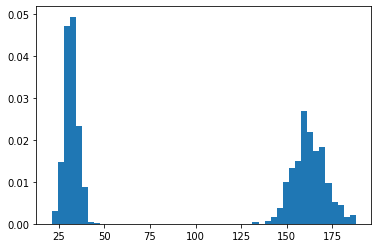

Training accuracy: 1.0
Validation accuracy: 1.0
Threshold: 47.473173640724184
SNR: 168.57894736842104


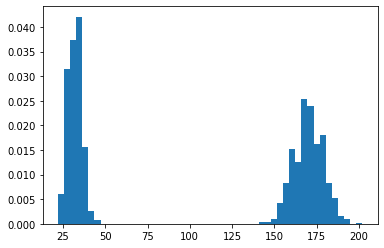

Training accuracy: 0.9985074626865672
Validation accuracy: 1.0
Threshold: 44.24992006646232
SNR: 179.05263157894734


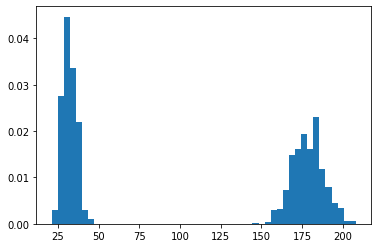

Training accuracy: 0.996268656716418
Validation accuracy: 1.0
Threshold: 43.12532043826353
SNR: 189.52631578947367


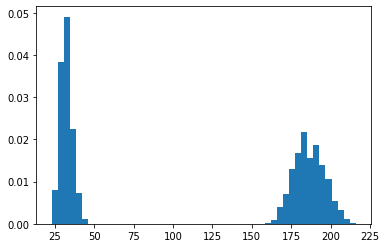

Training accuracy: 0.996268656716418
Validation accuracy: 1.0
Threshold: 43.114268140169216
SNR: 200.0
time elapsed: 18.725852727890015


In [11]:
# 2, 3
thresholds = []
accuracies_tr = []
accuracies_val = []
clfs = []

dx = dy = int(2 * np.sqrt(simulator.variance))
x0 = y0 = (img_size - dx) // 2

prev_time = time.time()
for i in range(data_tr_for_different_snr.shape[0]):
    
    clf = detector(img_size, x0, y0, dx, dy)
    accuracy_tr, accuracy_val, thresh = clf.train(data_tr_for_different_snr[i], labels_tr_for_different_snr[i], verbose=True)
    print(f"SNR: {SNR[i]}")
    thresholds.append(clf.thresh)
    clfs.append(clf)
    accuracies_tr.append(accuracy_tr)
    accuracies_val.append(accuracy_val)
print(f"time elapsed: {time.time() - prev_time}")

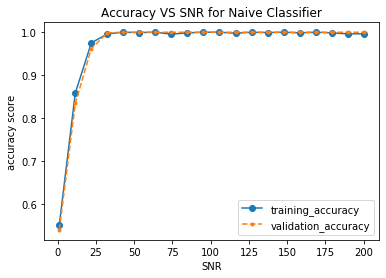

In [12]:
plt.plot(SNR, accuracies_tr, marker='o')
plt.plot(SNR, accuracies_val, marker='.', linestyle='--')
plt.legend(['training_accuracy', 'validation_accuracy'], loc='lower right')
plt.xlabel("SNR")
plt.ylabel("accuracy score")
plt.title("Accuracy VS SNR for Naive Classifier")
plt.show()

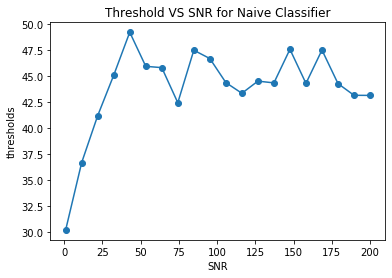

In [13]:
plt.plot(SNR, thresholds, marker='o')
plt.xlabel("SNR")
plt.ylabel("thresholds")
plt.title("Threshold VS SNR for Naive Classifier")
plt.show()

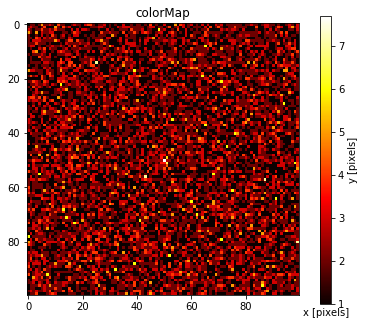

1
[1.         1.         3.         1.         1.         1.
 1.         1.         2.         1.         2.         1.
 2.         2.         1.         4.         3.         1.
 1.         1.         2.         2.         5.         3.
 1.         4.         2.         2.         2.         1.
 2.         1.         3.         1.         1.         1.
 2.         4.00000003 3.00000035 1.00000351 1.0000287  3.00019187
 1.00105031 3.00470717 3.01727201 2.051888   1.12762389 2.25700294
 1.42372622 3.57197057 3.63212524 6.57197057 1.42372622 1.25700294
 2.12762389 1.051888   3.01727201 3.00470717 2.00105031 2.00019187
 2.0000287  2.00000351 2.00000035 2.00000003 3.         1.
 1.         4.         3.         3.         1.         2.
 2.         1.         2.         2.         1.         3.
 2.         1.         2.         2.         1.         1.
 2.         2.         2.         1.         2.         3.
 1.         1.         1.         3.         3.         2.
 3.         2.        

In [17]:
idx=3
a = data_tr_for_different_snr[2][idx]
b = labels_tr_for_different_snr[2][idx]
# print(clf)
visualize(a)
print(b)
print(a[51])